## <center>KEMENTRIAN PENDIDIKAN DAN KEBUDAYAAN
## <center>PROGRAM STUDI GEOFISIKA JURUSAN FISIKA
## <center>FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM
# <center>UNIVERSITAS GADJAH MADA
***
## <center>PRAKTIKUM METODE ANALISIS GEOFISIKA 
## <center>ACARA 8. TRANSFORMASI FOURIER DISKRIT DAN RESPON FREKUENSI</center>

# <p>

<img src="http://www.luk.staff.ugm.ac.id/logo/UGM/Resmi/Hitam-putih.gif" width="300" height="300" />
 
# <p>
# <p>
# <p>
### <center>DISUSUN OLEH : 
### <center>TAUFIQURRAHMAN SAGAF KELREY
### <center>19/442442/PA/19191
# <p>   
### <center>ASISTEN : 
### <center>TIM ASISTEN PRAKTIKUM METODE ANALISIS GEOFISIKA 1 2021
***
## <center>YOGYAKARTA
## <center>NOVEMBER
## <center>2021

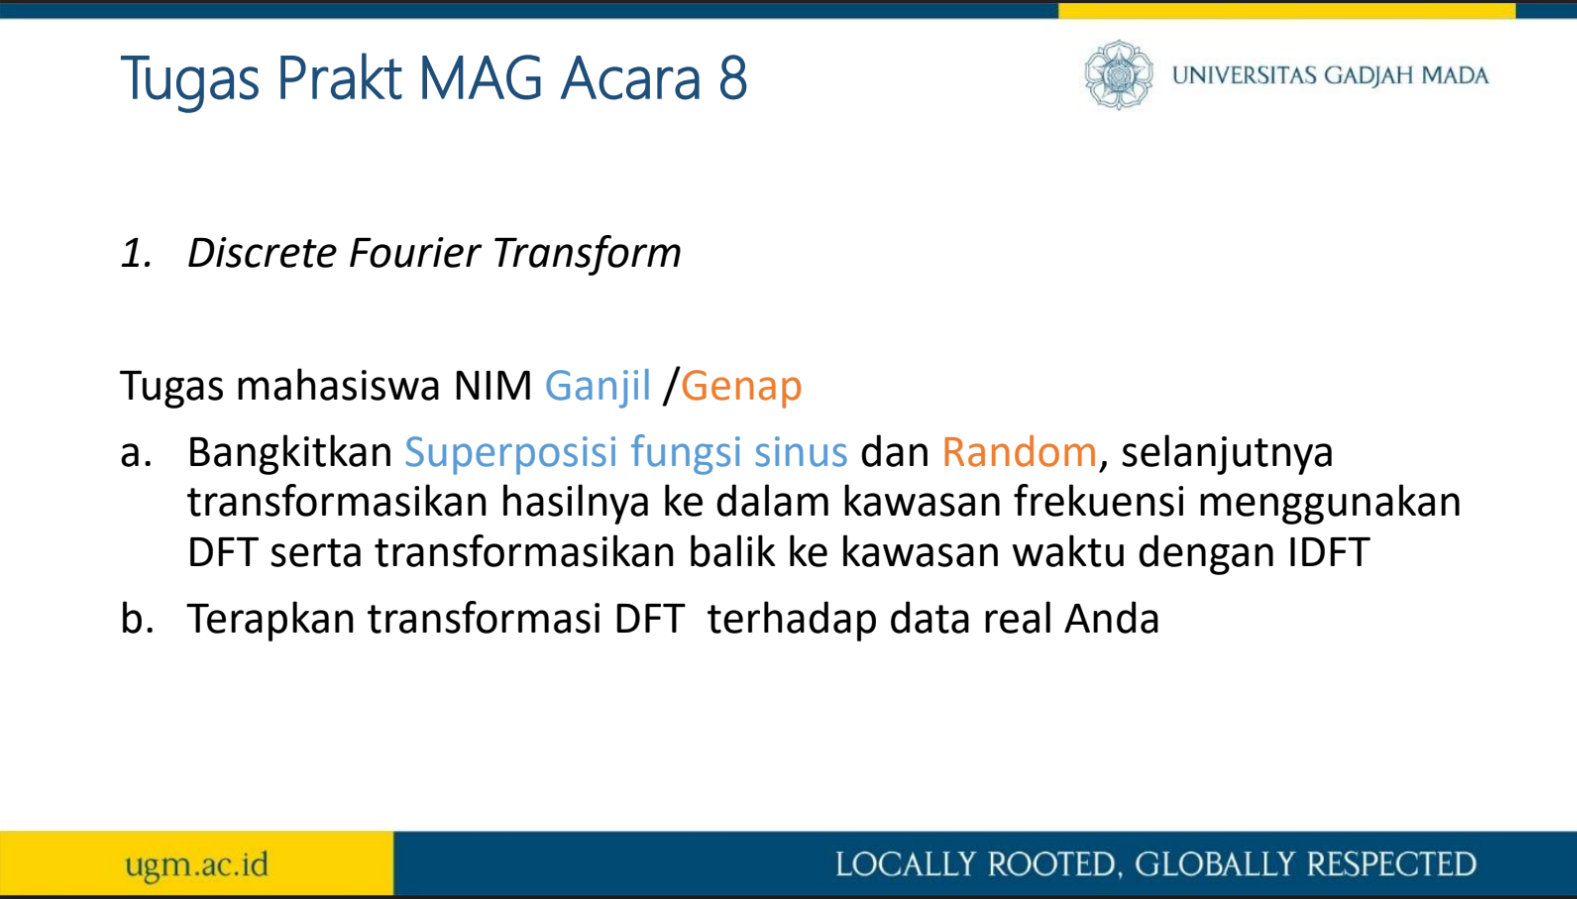

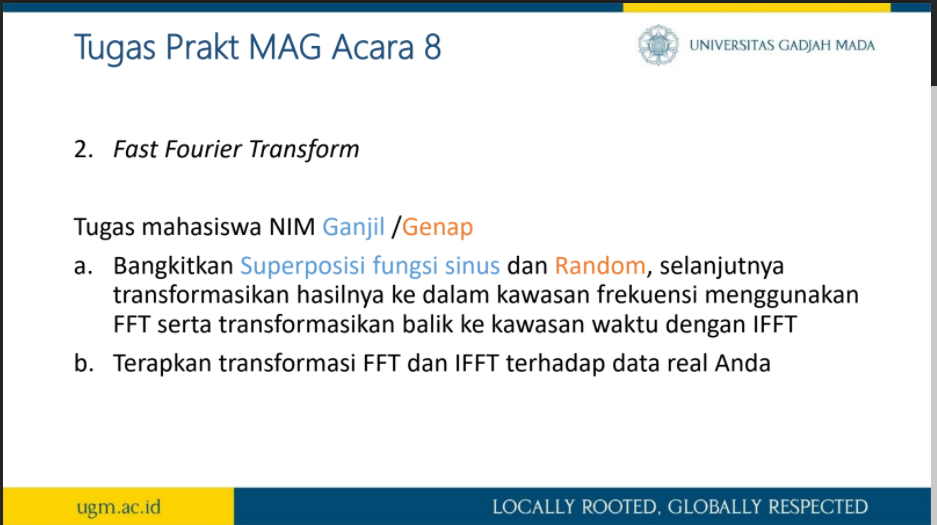

#### 1. $Diskrit Fourier Transform$

In [1]:
#import modul
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import soundfile as sf
from scipy.fftpack import fft,ifft

In [2]:
#mendefinisikan DFT
def naive_DFT(x): 
    N = np.size(x)
    X = np.zeros((N,),dtype=np.complex128) 
    for m in range(0,N):
        for n in range(0,N):
            X[m] += x[n]*np.exp(-np.pi*2j*m*n/N)
    return X

#mendefinisikan IDFT
def naive_IDFT(x):
    N = np.size(x)
    X = np.zeros((N,),dtype=np.complex128)
    for m in range(0,N):
        for n in range(0,N):
            X[m] += x[n]*np.exp(np.pi*2j*m*n/N)
    return X/N            

In [3]:
#mendefinisikan fungsi random
N = 1000 #sample point
dt = 1.0/200.0 #sample spacing
t = np.linspace(0.0, N*dt, N) #
yr = np.random.rand(N,1)
y = yr-np.median(yr)

#memanggil fungsi DFT
yf = naive_DFT(y)
xf = np.linspace(0,1/(2*dt),N//2)

#memanggil fungsi IDFT
yif = naive_IDFT(yf)

D:\PYTHON\Miniconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


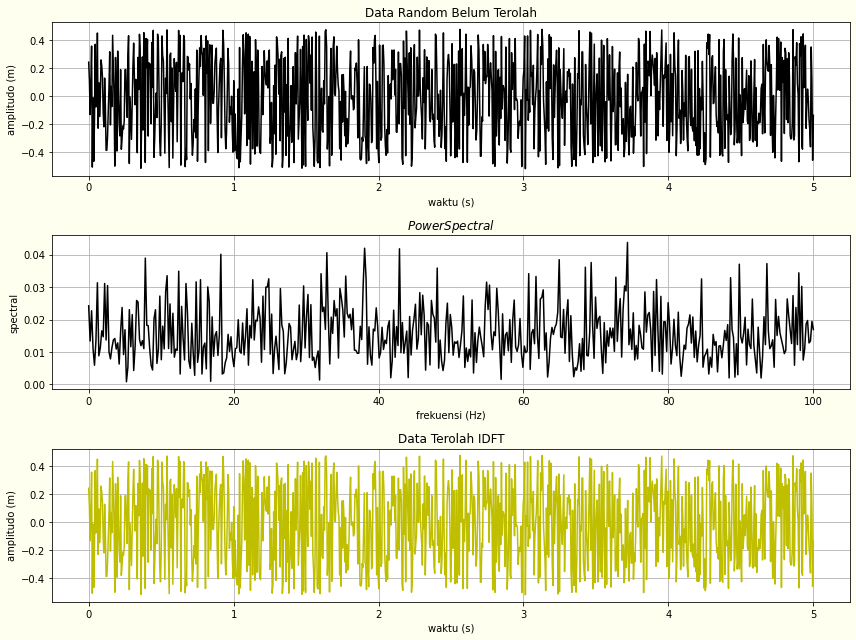

In [4]:
plt.figure(figsize=(12,9), facecolor='ivory')

#plot data belum terolah
plt.subplot(3,1,1)
plt.title("Data Random Belum Terolah")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,y, 'k-')
plt.grid()

#plot DFT
plt.subplot(3,1,2)
plt.title("$Power Spectral$")
plt.xlabel("frekuensi (Hz)")
plt.ylabel("spectral")
plt.plot(xf,2/N*np.abs(yf[0:N//2]), 'k-')
plt.grid()

#plot IDFT
plt.subplot(3,1,3)
plt.title("Data Terolah IDFT")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,yif, 'y-')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#memanggil data real
x, fs = sf.read('./speech.wav')
t1 = np.arange(len(x))/fs
dt = 1/fs
N = x.size

#memanggil DFT
yfr = naive_DFT(x)
xfr = np.linspacee(0.0, 1.0/(2.0*dt), N//2)

In [ ]:
plt.figure(figsize=(12,6), facecolor='ivory')

#plot data real belum terolah
plt.subplot(2,1,1)
plt.title("Data Belum Terolah")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,x, 'k-')
plt.grid()

#plot DFT
plt.subplot(2,1,2)
plt.title("$Power Spectral$")
plt.xlabel("frekuensi (Hz)")
plt.ylabel("spectral")
plt.plot(xf,2/N*np.abs(yf[0:N//2]), 'k-')
plt.grid()


plt.tight_layout()
plt.show()

#### $Fast Fourier Transform (genap)$

In [ ]:
#Mendefinisikan fungsi sinyal random
N = 1000 #bilangan titik sampel
dt = 1.0 / 100.0 #spasi sample
t = np.linspace(0.0, N*dt, N) #mendefinisikan waktu
yr = np.random.rand(N,1) 
y = yr-np.median(yr) #mendefinisikan sinyal random

#memanggil fungsi FFT
yf = fft(y) #
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)

#memangil fungsi IFFT
yif = ifft(yf)

In [ ]:
plt.figure(figsize=(12,9), facecolor='ivory')

#plot data belum terolah
plt.subplot(3,1,1)
plt.title("Data Random Belum Terolah FFT")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,y, 'k-')
plt.grid()

#plot FFT
plt.subplot(3,1,2)
plt.title("$Power Spectral$")
plt.xlabel("frekuensi (Hz)")
plt.ylabel("spectral")
plt.plot(xf,2/N*np.abs(yf[0:N//2]), 'k-')
plt.grid()

#plot IFFT
plt.subplot(3,1,3)
plt.title("FFT $Inverse$")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,abs(yif), 'y-')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#membaca file rekaman
x, fs = sf.read('speech.wav') #import data rekaman suara
t = np.arange(len(x))/fs #mendefinisikan interval waktu
dt = 1/fs
N = x.size

#memanggil FFT
yf = fft(x)
xf = np.linspace(0.0, 0.1/(2.0*dt), N//2)

#memanggil IFFT
yif = ifft(yf)

In [ ]:
plt.figure(figsize=(12,9), facecolor='ivory')

#plot data belum terolah
plt.subplot(3,1,1)
plt.title("Data Speech Belum Terolah FFT")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,x, 'k-')
plt.grid()

#plot data terolah FFT
plt.subplot(3,1,2)
plt.title("$Power Spectral$")
plt.xlabel("frekuensi (Hz)")
plt.ylabel("spectral")
plt.plot(xf,2/N*np.abs(yf[0:N//2]), 'k-')
plt.grid()

#plot FFT terinverse IFFT
plt.subplot(3,1,3)
plt.title("FFT $Inverse$")
plt.xlabel("waktu (s)")
plt.ylabel("amplitudo (m)")
plt.plot(t,abs(yif), 'y-')
plt.grid()

plt.tight_layout()
plt.show()